# Using Linear Regression(Inbuilt funtion from sklearn)

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
df = pd.read_csv("content/Salary_dataset.csv")


In [3]:
df.shape[0]


30

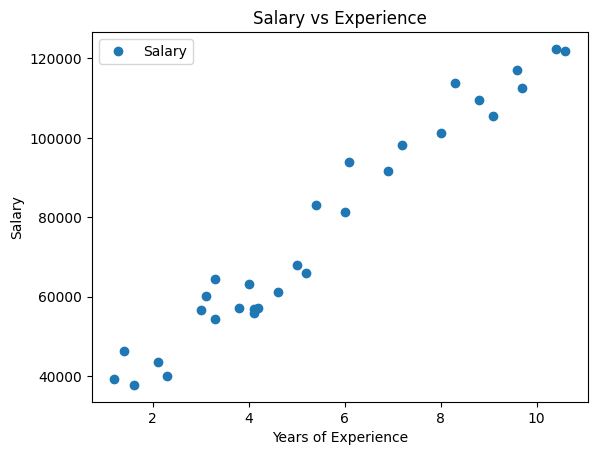

In [4]:
df.plot(x="YearsExperience", y="Salary", style="o")
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


In [5]:
X = df["YearsExperience"].values.reshape(-1, 1)
Y = df["Salary"].values


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [7]:
lr = LinearRegression()
lr.fit(X_test, Y_test)
print(X_test)
print(Y_test)


[[ 1.6]
 [10.4]
 [ 4.2]
 [ 4. ]
 [ 9.6]
 [ 8.8]]
[ 37732. 122392.  57082.  63219. 116970. 109432.]


In [8]:
print(lr.score(X_test, Y_test))


0.9934483090292765


Text(0, 0.5, 'Salary')

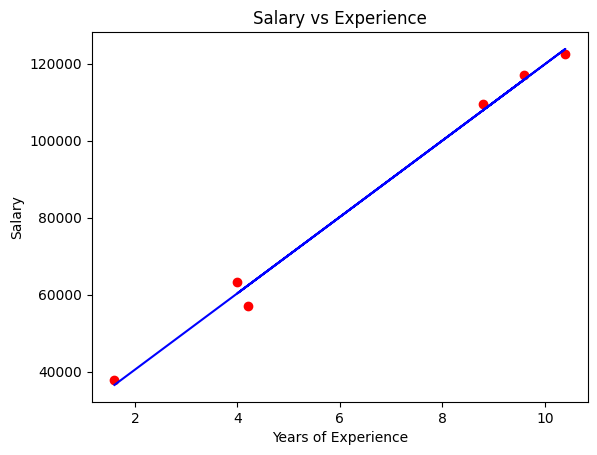

In [9]:
Y_pred = lr.predict(X_test)
plt.scatter(X_test, Y_test, color="red")
plt.plot(X_test, Y_pred, color="blue")
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")


# Calculating LinearRegression manually

## Cost Funtion

In [10]:
def cost(X, y, w, b):
    m = len(X)
    cost = 0
    for i in range(m):
        f_wb = w * X[i] + b
        cost += (f_wb - y[i]) ** 2
    total_cost = cost / (2 * m)
    return total_cost


## Compute Gradient

In [11]:
def compute_gradient(X, y, w, b):
    dj_dw = 0
    dj_db = 0
    m = len(X)
    for i in range(m):
        f_wb = w * X[i] + b
        dj_dw += (f_wb - y[i]) * X[i]
        dj_db += f_wb - y[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db


## Gradient Descent

In [12]:
def gradient_descent(
    X, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function
):
    j_history = []
    p_history = []
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        # if i < 100000:
        #   j_history.append(cost_function(X,y,w,b))
        #   p_history.append([w,b])
        # if i% math.ceil(num_iters/10) == 0:
        #         print(f"Iteration {i:4}: Cost {float(j_history[-1]):0.2e} ",
        #               f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
        #               f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b
    # ,j_history,p_history


In [13]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 0.01
w_final, b_final = gradient_descent(
    X_test, Y_test, w_init, b_init, tmp_alpha, iterations, cost, compute_gradient
)
print(w_final, b_final)


[9921.71102346] [20641.49241137]


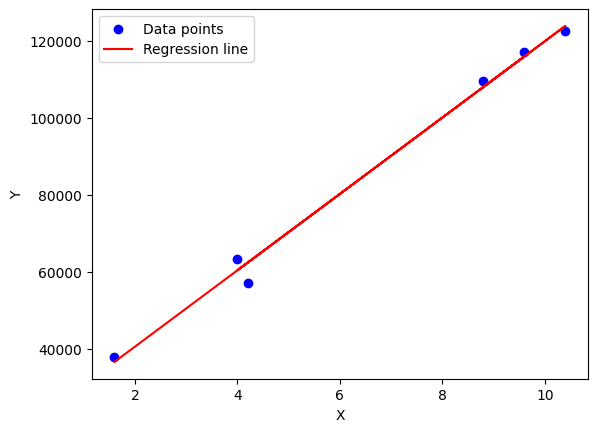

In [14]:
def plot_regression_line(X, y, w, b):
    plt.scatter(X, y, color="blue", label="Data points")
    y_pred = [w * x + b for x in X]
    plt.plot(X, y_pred, color="red", label="Regression line")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()


# Plot the final regression line
plot_regression_line(X_test, Y_test, w_final, b_final)


In [15]:
def mean_squared_error(y_true, y_pred):
    m = len(y_true)
    mse = np.sum((y_true - y_pred) ** 2) / m
    return mse


def mean_absolute_error(y_true, y_pred):
    m = len(y_true)
    mae = np.sum(np.abs(y_true - y_pred)) / m
    return mae


y_pred = [w_final * x + b_final for x in X_test]

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 12964545989.744734
Mean Absolute Error: 217903.35801357627
